# Calculating N-gram Probability


### N-gram = a sequence of N words 

Examples:

```
Unigrams (N=1-grams) are words: 'New', 'York', 'City'
Bigrams (N=2-grams): 'New York'
Trigrams (N=3-grams): 'New York City'

```

N-grams are useful because, e.g., using the bag-of-words model, treating `New York` as a single feature has more meaning than`New` and `York.




### N-gram models: N-gram Probabilities 

Example: Bigram probability P(b) where b=(w2,w1) is the probability of word 'w1' occurring after word 'w2'

**Bigram Probability formula:** 
    
*Prob(b) = Count(b) /Count(w2)*

or 

*Prob(b) = Count(b)/Count(b[0])*


Interpretation: the bigram probability, P(b) represents the number of times the words occurs in the required sequence (w2,w1) divided by the number of the times the word 'w2' occurs before the expected word 'w1' in the text

In general, given a sentence “Thank you so much for your”,  an n-gram model can be used to predict what the next word will be by calculating the n-gram probabilities. 

N-grams models applications: Predict the next word. 

Example of applications: autocompletion, spellchecks systems 



In [1]:
import nltk

from nltk.util import ngrams

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
text = """
    To all of you who need a miracle in their lives: don't stop believing 
because miracles happen and fortune will smile upon you – be brave.

May everyone who sees this message receives the miracles they have been wishing for!

Anyone reading this, may get whatever they want in life. 

If you’re reading this, it’s coming, be patient - the universe has your back-don’t worry about it.

If you are reading this at night, you should get some sleep, and do not stress about anything – don’t worry about the world or what you are going through; don't dwell on things from the past and don't stress about the future; just live your life, because you have one, so do whatever makes you happy and do not what other people want from you.
Surrender all the negativity and non-sense and you will see miracles happen in your life. I got everything for my highest good! You are loved!

Anyone reading this, may you achieve whatever you are longing for, because the Universe always delivers, it never fails; I am telling you my friends, because I have witnessed it myself so many times.

We don’t know each other, but I wish you all the best in life, and may all things work out in your favor.

Years of deep anger and sadness have finally reached my consciousness to letting them go.

I wish anyone and everyone health and safety because we are all one; peace, love and strength to all who read this and to all who need it.

Radiating with positive energy, let any negativity go away to allow abundance coming in my way.
To the person who is reading this, you are beautiful and loved, you are unique, you will receive your desires; trust the universe and tale care for yourself.

If you don't get your results immediately, let some time as things take time; the Universe works at its own pace and you will get it; it is powerful. 

Our so-called objective reality can be shifted just by breathing deeper; I feel like we are eternal and that there are endless opportunities for this life to play out and it’s only my responsibility to choose the path I want to go. 

If you are reading this, you have no time and all the time in the world. You are loved, and your light is needed to brighten this world today.

To anybody reading this, I wish that whatever is hurting you or whatever you are constantly stressing about, things will get better for you.
May the dark thoughts, the overthinking, and the doubts exit your mind now; may clarity replace confusion, may peace and calmness fill your life; have no fears and take control of your life; there is 
abundance for everyone, and you deserve financial freedom and true love, and all the happiness and health.

Whoever reads this, wherever you are in this world, I wish you many blessings of happiness, light, love and all of the miracles that you desire!

If you are reading this, you are going to celebrate something special very soon. You will be full of joy and happiness and sharing your good news. It will almost seem out of this world; how suddenly it will all happened for you. Be ready, my friend, and expect it, it is happening!

Whoever reads this, I hope your life is filled with joy and happiness.

Helping people live their dreams; miracles happen.

If you read this, I wish you great success, health, love and happiness.

Greatness will come to you. Everything you’ve ever dreamed of is on its way. Be grateful for the things you have, and be grateful for what you want and you will receive.

I see a lot of changes in my life; everything goes well; thanking the Universe.

Sending love, peace, and protection to all of you, beautiful souls who are reading this. 

For those who have found my message: may you find peace within yourself; know that you are loved, 
you are favored, you are protected in every way; opportunities will flow towards you easily and endlessly, all of your needs are met, you wish nothing because you have everything. 

You have access to everything you want and need; your light matter, you are important and you are healed. 

You are not identified with your past or your mistakes or the trauma that you experienced, they pain that you suffered; you are made of light and love, you are creative being and you can give birth to new beginnings, ideas, etc. 

You are beautiful and you are accepted and loved.

Have faith everyone; life will meet you whatever you are and will take you to where you want to be. If you are reading this, it's not too late to achieve your dreams!

To anyone reading this, I send you positive energy; please try to stay on a high vibration.

To everyone reading this, all negative cycles are ending. I forgive all those that ever brought me sadness or pain, and I forgive myself for all my mistakes and past self-induced hindrances.

I welcome sincere love, joy, peace, good health and great wealth; I am ready and worthy of sincere love, joy, peace, good health and great wealth. 

May everyone have a blessed life and lot of successes.

To anyone who may read this, you have everything you need to overcome your difficulties, and the Universe have you back.

I wish everyone who read this to receive unexpected blessing, good health, abundance, love and peace.

If you are reading this, you will achieve your dreams soon; have faith and be determined

May all you who are struggling to achieve your goals, believe you are just one step closer, have faith; the Universe is own your side.

If you are reading this, your dreams become a reality; your life is filled with peace and abundance, and you are loved.

For everyone that is reading this, may the angels give you peace and fulfill you with love. 

Love is powerful and we must spread it to the world to protect us.

Please accept this peace that I send you all, along with boundless love brightest light

If you are reading this, do not give up. You are close to accomplish your goals; you will get the energy and motivation to get to the finish line. 

I choose to remain positive, and I receive all the abundance, love and peace; I am so grateful for everything.


We all are an amazingly powerful healers; we have everything we need within ourselves to heal ourselves and others around us; raise your frequency, and start healing your life! 

May all your dreams come true.

Best wishes to everyone who needs healing and miracles in their life.
Stay positive -  love can change your entire life; I was having a rough time for the past 10 years and it is crazy how everything came to an end.

You will achieve everything you have ever dreamt of! 

Tomorrow is going to be a good day; you are enough, you are worthy, you are loved.

Wishing every soul: love, peace and healing.

Stay blessed; always believe that miracles happen.

Whoever is reading this, you will heal of all things that ail you, and absolved of all your worries.

Thank you, the Universe. I am wishing everyone good health.

Loving energy that you can share can make someone feel good; if you are reading this do not give up, whatever you are chasing will find it's way to you; claim it.

You are loved, you are important, extraordinary, strong, no matter how big are the obstacle in your way, you shall persevere. 

It is all within our willpower as humans to keep going; it is our existence right. 

Do not ever doubt yourself.
Sending positive vibrations, good fortune in wealth, health, and happiness. 

To anyone reading this, just remember my words: all your dreams will come true.

I am so grateful to see the power of positive manifestation in my life, my mind, my body, my soul, my spirit is being cleansed and the universe is delivering my synchronicities multiple times a day. 

Believe and you can achieve, all my love to each and everyone one of you may you have an amazing life.

Safety and blessings to everyone.

Anyone reading this, I wish you abundance in your life.

Wishing you all good health, wealth, prosperity, Love, peace and happiness; may all of your desires come full speed; don’t forget to be thankful for life- love is awesome.

We are limitless, pure love and joy.

Greatness will come to all of us.

Everything you’ve ever dreamed of is on its way so be grateful for what you have and grateful for what you want to receive. 


To anyone reading this: yes, it’s coming; be patient - the universe has your back; don’t spend your life in worries.
"""

In [3]:
# break the text into sentences on .
sents = (sent_tokenize(text)) 
sents

["\n    To all of you who need a miracle in their lives: don't stop believing \nbecause miracles happen and fortune will smile upon you – be brave.",
 'May everyone who sees this message receives the miracles they have been wishing for!',
 'Anyone reading this, may get whatever they want in life.',
 'If you’re reading this, it’s coming, be patient - the universe has your back-don’t worry about it.',
 "If you are reading this at night, you should get some sleep, and do not stress about anything – don’t worry about the world or what you are going through; don't dwell on things from the past and don't stress about the future; just live your life, because you have one, so do whatever makes you happy and do not what other people want from you.",
 'Surrender all the negativity and non-sense and you will see miracles happen in your life.',
 'I got everything for my highest good!',
 'You are loved!',
 'Anyone reading this, may you achieve whatever you are longing for, because the Universe alwa

Unigrams:

In [4]:
#using split() because it doesn’t consider punctuation symbols as a separate token

tokens=[]
for i in range(len(sents)):
    for w in sents[i].split():
        tokens.append(w)   
print(tokens)

['To', 'all', 'of', 'you', 'who', 'need', 'a', 'miracle', 'in', 'their', 'lives:', "don't", 'stop', 'believing', 'because', 'miracles', 'happen', 'and', 'fortune', 'will', 'smile', 'upon', 'you', '–', 'be', 'brave.', 'May', 'everyone', 'who', 'sees', 'this', 'message', 'receives', 'the', 'miracles', 'they', 'have', 'been', 'wishing', 'for!', 'Anyone', 'reading', 'this,', 'may', 'get', 'whatever', 'they', 'want', 'in', 'life.', 'If', 'you’re', 'reading', 'this,', 'it’s', 'coming,', 'be', 'patient', '-', 'the', 'universe', 'has', 'your', 'back-don’t', 'worry', 'about', 'it.', 'If', 'you', 'are', 'reading', 'this', 'at', 'night,', 'you', 'should', 'get', 'some', 'sleep,', 'and', 'do', 'not', 'stress', 'about', 'anything', '–', 'don’t', 'worry', 'about', 'the', 'world', 'or', 'what', 'you', 'are', 'going', 'through;', "don't", 'dwell', 'on', 'things', 'from', 'the', 'past', 'and', "don't", 'stress', 'about', 'the', 'future;', 'just', 'live', 'your', 'life,', 'because', 'you', 'have', 'one,

In [5]:
from nltk.corpus import stopwords
s=set(stopwords.words('english'))

tokens = [w for w in tokens if w not in s]
print(tokens)

['To', 'need', 'miracle', 'lives:', 'stop', 'believing', 'miracles', 'happen', 'fortune', 'smile', 'upon', '–', 'brave.', 'May', 'everyone', 'sees', 'message', 'receives', 'miracles', 'wishing', 'for!', 'Anyone', 'reading', 'this,', 'may', 'get', 'whatever', 'want', 'life.', 'If', 'you’re', 'reading', 'this,', 'it’s', 'coming,', 'patient', '-', 'universe', 'back-don’t', 'worry', 'it.', 'If', 'reading', 'night,', 'get', 'sleep,', 'stress', 'anything', '–', 'don’t', 'worry', 'world', 'going', 'through;', 'dwell', 'things', 'past', 'stress', 'future;', 'live', 'life,', 'one,', 'whatever', 'makes', 'happy', 'people', 'want', 'you.', 'Surrender', 'negativity', 'non-sense', 'see', 'miracles', 'happen', 'life.', 'I', 'got', 'everything', 'highest', 'good!', 'You', 'loved!', 'Anyone', 'reading', 'this,', 'may', 'achieve', 'whatever', 'longing', 'for,', 'Universe', 'always', 'delivers,', 'never', 'fails;', 'I', 'telling', 'friends,', 'I', 'witnessed', 'many', 'times.', 'We', 'don’t', 'know', 'o

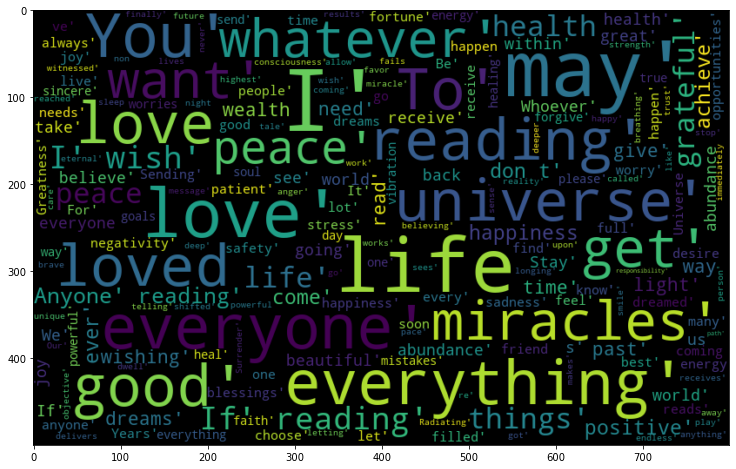

In [6]:
import wordcloud
import matplotlib.pyplot as plt 

from wordcloud import WordCloud
wc = WordCloud(width=800, height=500, random_state=123, max_font_size=100).generate(str(tokens))

# plot 
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [7]:
# create a dict with frequency count of each word

uCount = {} 
for i in range(len(tokens)-1):
        if tokens[i] in uCount:
            uCount[tokens[i]] += 1
        else:
            uCount[tokens[i]] = 1
print(uCount)

{'To': 8, 'need': 4, 'miracle': 1, 'lives:': 1, 'stop': 1, 'believing': 1, 'miracles': 7, 'happen': 2, 'fortune': 2, 'smile': 1, 'upon': 1, '–': 2, 'brave.': 1, 'May': 5, 'everyone': 9, 'sees': 1, 'message': 1, 'receives': 1, 'wishing': 2, 'for!': 1, 'Anyone': 3, 'reading': 21, 'this,': 21, 'may': 10, 'get': 7, 'whatever': 7, 'want': 7, 'life.': 5, 'If': 10, 'you’re': 1, 'it’s': 3, 'coming,': 1, 'patient': 2, '-': 3, 'universe': 4, 'back-don’t': 1, 'worry': 2, 'it.': 3, 'night,': 1, 'sleep,': 1, 'stress': 2, 'anything': 1, 'don’t': 4, 'world': 3, 'going': 3, 'through;': 1, 'dwell': 1, 'things': 6, 'past': 4, 'future;': 1, 'live': 2, 'life,': 3, 'one,': 1, 'makes': 1, 'happy': 1, 'people': 2, 'you.': 4, 'Surrender': 1, 'negativity': 2, 'non-sense': 1, 'see': 3, 'I': 26, 'got': 1, 'everything': 7, 'highest': 1, 'good!': 1, 'You': 9, 'loved!': 1, 'achieve': 5, 'longing': 1, 'for,': 1, 'Universe': 4, 'always': 2, 'delivers,': 1, 'never': 1, 'fails;': 1, 'telling': 1, 'friends,': 1, 'witnes

In [9]:
uCount.get('peace')

7

Bigrams:

In [10]:
bigrams = [a for s in sents for a in zip(s.split(" ")[:-1], s.split(" ")[1:])]
  
print(bigrams)

[('\n', ''), ('', ''), ('', ''), ('', 'To'), ('To', 'all'), ('all', 'of'), ('of', 'you'), ('you', 'who'), ('who', 'need'), ('need', 'a'), ('a', 'miracle'), ('miracle', 'in'), ('in', 'their'), ('their', 'lives:'), ('lives:', "don't"), ("don't", 'stop'), ('stop', 'believing'), ('believing', '\nbecause'), ('\nbecause', 'miracles'), ('miracles', 'happen'), ('happen', 'and'), ('and', 'fortune'), ('fortune', 'will'), ('will', 'smile'), ('smile', 'upon'), ('upon', 'you'), ('you', '–'), ('–', 'be'), ('be', 'brave.'), ('May', 'everyone'), ('everyone', 'who'), ('who', 'sees'), ('sees', 'this'), ('this', 'message'), ('message', 'receives'), ('receives', 'the'), ('the', 'miracles'), ('miracles', 'they'), ('they', 'have'), ('have', 'been'), ('been', 'wishing'), ('wishing', 'for!'), ('Anyone', 'reading'), ('reading', 'this,'), ('this,', 'may'), ('may', 'get'), ('get', 'whatever'), ('whatever', 'they'), ('they', 'want'), ('want', 'in'), ('in', 'life.'), ('If', 'you’re'), ('you’re', 'reading'), ('read

In [12]:
#create a dict with frequency count of each bigram

bCount = {} 
for i in range(len(tokens)-1):
    if (tokens[i], tokens[i+1]) in bCount:
        bCount[(tokens[i], tokens[i + 1])] += 1
    else:
        bCount[(tokens[i], tokens[i + 1])] = 1
print(bCount)

{('To', 'need'): 1, ('need', 'miracle'): 1, ('miracle', 'lives:'): 1, ('lives:', 'stop'): 1, ('stop', 'believing'): 1, ('believing', 'miracles'): 1, ('miracles', 'happen'): 2, ('happen', 'fortune'): 1, ('fortune', 'smile'): 1, ('smile', 'upon'): 1, ('upon', '–'): 1, ('–', 'brave.'): 1, ('brave.', 'May'): 1, ('May', 'everyone'): 2, ('everyone', 'sees'): 1, ('sees', 'message'): 1, ('message', 'receives'): 1, ('receives', 'miracles'): 1, ('miracles', 'wishing'): 1, ('wishing', 'for!'): 1, ('for!', 'Anyone'): 1, ('Anyone', 'reading'): 3, ('reading', 'this,'): 17, ('this,', 'may'): 3, ('may', 'get'): 1, ('get', 'whatever'): 1, ('whatever', 'want'): 1, ('want', 'life.'): 1, ('life.', 'If'): 1, ('If', 'you’re'): 1, ('you’re', 'reading'): 1, ('this,', 'it’s'): 1, ('it’s', 'coming,'): 1, ('coming,', 'patient'): 1, ('patient', '-'): 2, ('-', 'universe'): 2, ('universe', 'back-don’t'): 1, ('back-don’t', 'worry'): 1, ('worry', 'it.'): 1, ('it.', 'If'): 1, ('If', 'reading'): 7, ('reading', 'night,'

In [13]:
bCount.get(('light,', 'love'))

1

In [14]:
bCount.get(('miracles', 'happen'))

2

In [15]:
print(uCount.get('miracles'))

7


Calculating Probabilities:

In [16]:
print(f"Probability that 'happen' occurs after 'miracles is: {bCount.get(('miracles', 'happen'))/uCount.get('miracles')}")

Probability that 'happen' occurs after 'miracles is: 0.2857142857142857
